In [6]:
import pandas as pd
data_frame =pd.read_csv('F:\Python\Mlearning\data.csv')
data_frame
data_frame[data_frame['Age']>20].head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [17]:
data_frame.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

,Name,Wage,Value,diff
0,L. Messi,565000.0,110500000.0,109935000.0
1,Cristiano Ronaldo,405000.0,77000000.0,76595000.0
2,Neymar Jr,290000.0,118500000.0,118210000.0
3,De Gea,260000.0,72000000.0,71740000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
...,...,...,...,...
18202,J. Lundstram,1000.0,60000.0,59000.0
18203,N. Christoffersson,1000.0,60000.0,59000.0
18204,B. Worman,1000.0,60000.0,59000.0
18205,D. Walker-Rice,1000.0,60000.0,59000.0


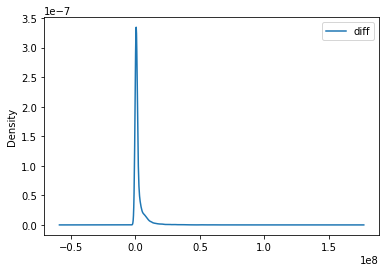

In [7]:
df1 = pd.DataFrame(data_frame, columns=['Name','Wage','Value'])

def valtofloat(a):
    if type(a) == float or type(a)==int:
        return a
    elif 'K' in a:
        if len(a)>1:
            return float(a.replace('K',''))*1000
        return 1000.0
    elif 'M' in a:
        if len(a)>1:
            return float(a.replace('M',''))*1000000
        return 1000000.0
    elif 'B' in a:
        if len(a)>1:
            return float(a.replace('B',''))*1000000000
        return 0.0
wage= df1['Wage'].replace('\€','',regex=True).apply(valtofloat)
value= df1['Value'].replace('\€','',regex=True).apply(valtofloat)
df1['Value']=value
df1['Wage']=wage
df1['diff']=df1['Value']-df1['Wage']
df1.sort_values('diff', ascending=False).plot.density(x='Name', y='diff')
df1

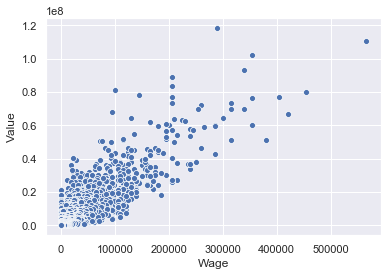

In [48]:
import seaborn as sb
sb.set()
graph= sb.scatterplot(x='Wage', y='Value',data=df1)
graph

In [15]:
from bokeh.plotting import figure, show,output_file 
from bokeh.models import HoverTool
tooltips = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
    
        ])
 
f = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value',width=700, plot_height=700, tools=[tooltips],title_location='above')
f.circle('Wage', 'Value', legend_label="Wage vs Value", fill_color="red", line_color="blue", size=6, source=df1)
f.select(HoverTool)
show(f)